In [36]:
import requests
import generate
import organize_data
import os

# before start

In [37]:
import os
from PIL import Image

def resize_and_rename_images(input_path, output_path, prefix):
    # 確保輸出路徑存在
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    # 獲取輸入路徑中的所有檔案
    files = os.listdir(input_path)
    image_files = [f for f in files if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif', 'webp'))]
    
    for i, file in enumerate(image_files):
        img = Image.open(os.path.join(input_path, file))
        img = img.resize((512, 512), Image.LANCZOS)
        new_filename = f"{prefix}{i+1}.png"
        img.save(os.path.join(output_path, new_filename), 'PNG')

# 使用範例
input_path = r'C:\coding\Professer Proj\Comfy\newMyComfy\myComfyUI\input\new'
output_path = r'C:\coding\Professer Proj\Comfy\newMyComfy\myComfyUI\input\new\resized'
prefix = 'SD_'
resize_and_rename_images(input_path, output_path, prefix)

# Utli

In [38]:
def get_queue_amount():
    # Make a GET request to the specified URL
    response = requests.get("http://127.0.0.1:8188/queue")

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        # Calculate the sum of "queue_running" and "queue_pending"
        total = len(data["queue_running"]) + len(data["queue_pending"])
        return total
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return -1


In [39]:
def get_image_names(input_image_prefix = 'DALLE_'):
    input_directory = '../../myComfyUI/input'
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.webp')

    # Get all image names in the input directory
    image_names = [f for f in os.listdir(input_directory) if f.lower().endswith(image_extensions)]


    image_names = [name for name in image_names if name.startswith(input_image_prefix)]

    print(image_names)
    return image_names


In [40]:
print(get_image_names("SD_"))

['SD_1.png', 'SD_10.png', 'SD_2.png', 'SD_3.png', 'SD_4.png', 'SD_5.png', 'SD_6.png', 'SD_7.png', 'SD_8.png', 'SD_9.png']
['SD_1.png', 'SD_10.png', 'SD_2.png', 'SD_3.png', 'SD_4.png', 'SD_5.png', 'SD_6.png', 'SD_7.png', 'SD_8.png', 'SD_9.png']


In [41]:
def generate_target_and_organize(target_image_name, category = 'DALLE'):
    generate.generate_target(target=target_image_name)

    from time import sleep

    while(get_queue_amount() > 0):
        print("not done yet")
        sleep(10)
        
    print("done")
    organize_data.organize_data(folder_name=target_image_name.split('.')[0], category=category)


In [42]:
def generate_by_category(category):
    print(category)
    image_names = get_image_names(input_image_prefix=category)
    print(image_names)
    for image_name in image_names:
        generate_target_and_organize(image_name, category)

In [43]:
categories = ["DALLE_", "SD_"]
for category in categories:
    generate_by_category(category = category)

DALLE_
['DALLE_57.png', 'DALLE_58.png', 'DALLE_59.png', 'DALLE_60.png', 'DALLE_61.png']
['DALLE_57.png', 'DALLE_58.png', 'DALLE_59.png', 'DALLE_60.png', 'DALLE_61.png']
200
{'prompt_id': 'bd2f09cb-cae9-4829-a355-97e330ada474', 'number': 630, 'node_errors': {}}
Step 1 done
200
{'prompt_id': '71264419-5364-471a-b4bc-3c533a5d8c5a', 'number': 631, 'node_errors': {}}
Step 2 done
200
{'prompt_id': '98ec29e1-265a-47e3-ac2e-3532cbc970e1', 'number': 632, 'node_errors': {}}
Step 3 done
200
{'prompt_id': 'f982aae9-924e-46bd-992f-d95e1f22c834', 'number': 633, 'node_errors': {}}
Step 4 done
200
{'prompt_id': '3dde439a-6519-48fa-a26b-6fe9d91ce878', 'number': 634, 'node_errors': {}}
Step 5 done
200
{'prompt_id': 'a1336162-dbea-4924-ad50-b5d6e8af072a', 'number': 635, 'node_errors': {}}
Step 6 done
200
{'prompt_id': 'f8088cde-d3cc-48eb-8ccc-1bfa727a8764', 'number': 636, 'node_errors': {}}
Step 7 done
200
{'prompt_id': 'a8dc5827-6b36-4f0d-bd91-169cdfaff152', 'number': 637, 'node_errors': {}}
Step 8 done

In [44]:
import os
import glob

def rename_files_in_directory(directory):
    # Step 1: Add "QQQ" in front of each filename to prevent conflicts
    for root, _, files in os.walk(directory):
        for filename in files:
            old_path = os.path.join(root, filename)
            new_path = os.path.join(root, "QQQ" + filename)
            os.rename(old_path, new_path)
    
    # Step 2: Rename files sequentially starting from 1
    for root, _, files in os.walk(directory):
        files = sorted(files)  # Sort files to maintain original order
        for i, filename in enumerate(files, start=1):
            old_path = os.path.join(root, filename)
            file_extension = os.path.splitext(filename)[1]
            new_filename = f"{i}{file_extension}"
            new_path = os.path.join(root, new_filename)
            os.rename(old_path, new_path)

def rename_file():
    # Define the root directory
    root_directory = '../analyze/hspace'

    # Traverse through each subdirectory in the root directory
    for subdir in glob.glob(os.path.join(root_directory, '**'), recursive=True):
        if os.path.isdir(subdir):
            rename_files_in_directory(subdir)

    # Repeat for the 'latent' directory
    root_directory = '../analyze/latent'
    for subdir in glob.glob(os.path.join(root_directory, '**'), recursive=True):
        if os.path.isdir(subdir):
            rename_files_in_directory(subdir)

In [45]:
rename_file()

In [46]:
import os
import glob
import pickle
import torch
import safetensors.torch

def load_hspace_file(filepath):
    """讀取 .pkl 檔案，並將 numpy.ndarray 轉換為 torch tensor"""
    with open(filepath, 'rb') as f:
        arr = pickle.load(f)
    return arr  # 以 numpy 的形式輸出

def load_latent_file(filepath):
    """利用 safetensors.torch 讀取 .latent 檔案，並取出 'latent_tensor'"""
    sd = safetensors.torch.load_file(filepath)
    return sd['latent_tensor'].numpy()  # 以 numpy 的形式輸出

def find_categories_and_names(base_dirs=["hspace", "latent"]):
    categories = {}
    for base in base_dirs:

        for category_path in glob.glob(os.path.join("../analyze/", base, '*')):
            if os.path.isdir(category_path):
                category = os.path.basename(category_path)
                if category not in categories:
                    categories[category] = []
                print(glob.glob(os.path.join(category_path, '*')))
                for name_path in glob.glob(os.path.join(category_path, '*')):
                    if os.path.isdir(name_path):
                        name = os.path.basename(name_path)
                        if name not in categories[category]:
                            categories[category].append(name)
    return categories

def load_all_data(base_dirs=[ 'hspace', "latent"], categories = ["QQ_", "WWWWW_"], types=["original", "addnoise"], timesteps=18):

    data = {}
    for category in categories:
        data[category] = {}
        for name in categories[category]:
            print(category, name)
            data[category][name] = {"hspace": {}, "latent": {}}
            for base in base_dirs:
                # 設定副檔名依據 base
                ext = "pkl" if base == "hspace" else "latent"
                for t in types:
                    # 組成路徑 pattern，例如 "hspace/category/name/original/*.pkl"
                    pattern = os.path.join("../analyze/", base, category, name, t, f"*.{ext}")
                    file_list = sorted(glob.glob(pattern))
                    # 若希望依照數字排序，且檔名為 1 ~ 18，可考慮使用檔名排序
                    # 若 file_list 長度不等於 timesteps，可自行檢查或跳過錯誤
                    tensor_list = []
                    for filepath in file_list:
                        if "hspace" in base:
                            tensor = load_hspace_file(filepath)
                        else:
                            tensor = load_latent_file(filepath)
                        tensor_list.append(tensor)
                    data[category][name][base][t] = tensor_list
    return data
base_dirs=["hspace", "latent"]
categories = find_categories_and_names(base_dirs)
print('------')
print(categories)
print('------')
# 執行資料載入
data_dict = load_all_data(base_dirs = base_dirs, categories = categories)
# 檢查資料載入結果
print("Data loaded successfully!")
print("Categories:", categories)

# 檢查其中一個 category 和 name 的資料形狀，例如 category1 的 name1 的 hspace original 第一筆
print("category1 name1 hspace original[0] shape:", data_dict["SD_"]["SD_4"]["hspace"]["original"][0].shape)



['../analyze/hspace\\DALLE_\\DALLE_57', '../analyze/hspace\\DALLE_\\DALLE_58', '../analyze/hspace\\DALLE_\\DALLE_59', '../analyze/hspace\\DALLE_\\DALLE_60', '../analyze/hspace\\DALLE_\\DALLE_61']
['../analyze/hspace\\SD_\\SD_1', '../analyze/hspace\\SD_\\SD_10', '../analyze/hspace\\SD_\\SD_2', '../analyze/hspace\\SD_\\SD_3', '../analyze/hspace\\SD_\\SD_4', '../analyze/hspace\\SD_\\SD_5', '../analyze/hspace\\SD_\\SD_6', '../analyze/hspace\\SD_\\SD_7', '../analyze/hspace\\SD_\\SD_8', '../analyze/hspace\\SD_\\SD_9']
['../analyze/latent\\DALLE_\\DALLE_57', '../analyze/latent\\DALLE_\\DALLE_58', '../analyze/latent\\DALLE_\\DALLE_59', '../analyze/latent\\DALLE_\\DALLE_60', '../analyze/latent\\DALLE_\\DALLE_61']
['../analyze/latent\\SD_\\SD_1', '../analyze/latent\\SD_\\SD_10', '../analyze/latent\\SD_\\SD_2', '../analyze/latent\\SD_\\SD_3', '../analyze/latent\\SD_\\SD_4', '../analyze/latent\\SD_\\SD_5', '../analyze/latent\\SD_\\SD_6', '../analyze/latent\\SD_\\SD_7', '../analyze/latent\\SD_\\SD_

In [47]:
import numpy as np

def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

def frechet_recursive(ca, P, Q, i, j):
    if ca[i, j] > -1:
        return ca[i, j]
    elif i == 0 and j == 0:
        ca[i, j] = euclidean(P[0], Q[0])
    elif i > 0 and j == 0:
        ca[i, j] = max(frechet_recursive(ca, P, Q, i-1, 0), euclidean(P[i], Q[0]))
    elif i == 0 and j > 0:
        ca[i, j] = max(frechet_recursive(ca, P, Q, 0, j-1), euclidean(P[0], Q[j]))
    elif i > 0 and j > 0:
        ca[i, j] = max(min(frechet_recursive(ca, P, Q, i-1, j),
                           frechet_recursive(ca, P, Q, i-1, j-1),
                           frechet_recursive(ca, P, Q, i, j-1)),
                       euclidean(P[i], Q[j]))
    else:
        ca[i, j] = float('inf')
    return ca[i, j]

def frechet_distance(P, Q):
    ca = np.ones((len(P), len(Q))) * -1
    return frechet_recursive(ca, P, Q, len(P)-1, len(Q)-1)




In [49]:
def calculate_frechet_distances(data_dict, categories):
    frechet_distances = {category: {"hspace": [], "latent": []} for category in categories}
    print(categories)
    for category in categories:
        for name in categories[category]:
            hspace_original = data_dict[category][name]["hspace"]["original"]
            hspace_addnoise = data_dict[category][name]["hspace"]["addnoise"]
            latent_original = data_dict[category][name]["latent"]["original"]
            latent_addnoise = data_dict[category][name]["latent"]["addnoise"]
            print(f"Calculating Frechet Distance for {category} - {name}")
            # 計算 hspace 的 Frechet Distance
            hspace_distance = frechet_distance(hspace_original, hspace_addnoise)
            frechet_distances[category]["hspace"].append(hspace_distance)
            print(f"category: {category}, name: {name}, hspace_distance: {hspace_distance}")
            
            # 計算 latent 的 Frechet Distance
            latent_distance = frechet_distance(latent_original, latent_addnoise)
            frechet_distances[category]["latent"].append(latent_distance)
            print(f"category: {category}, name: {name}, latent_distance: {latent_distance}")
        print("chage category")
    
    return frechet_distances

In [50]:
frechet_distances = calculate_frechet_distances(data_dict, categories)

{'DALLE_': ['DALLE_57', 'DALLE_58', 'DALLE_59', 'DALLE_60', 'DALLE_61'], 'SD_': ['SD_1', 'SD_10', 'SD_2', 'SD_3', 'SD_4', 'SD_5', 'SD_6', 'SD_7', 'SD_8', 'SD_9']}
Calculating Frechet Distance for DALLE_ - DALLE_57
category: DALLE_, name: DALLE_57, hspace_distance: 989.3549194335938
category: DALLE_, name: DALLE_57, latent_distance: 1567.908203125
Calculating Frechet Distance for DALLE_ - DALLE_58
category: DALLE_, name: DALLE_58, hspace_distance: 1068.4552001953125
category: DALLE_, name: DALLE_58, latent_distance: 1567.8182373046875
Calculating Frechet Distance for DALLE_ - DALLE_59
category: DALLE_, name: DALLE_59, hspace_distance: 1140.206787109375
category: DALLE_, name: DALLE_59, latent_distance: 1568.56396484375
Calculating Frechet Distance for DALLE_ - DALLE_60
category: DALLE_, name: DALLE_60, hspace_distance: 1134.030029296875
category: DALLE_, name: DALLE_60, latent_distance: 1568.823486328125
Calculating Frechet Distance for DALLE_ - DALLE_61
category: DALLE_, name: DALLE_61

In [51]:
# 計算每個 category 的 Frechet Distance 平均值
def calculate_average_frechet_distances(frechet_distances):
    average_distances = {}
    
    for category, distances in frechet_distances.items():
        print(category)
        print(distances)
        if category not in average_distances:
            average_distances[category] = {}
        for space, values in distances.items():
            if space not in average_distances[category]:
                average_distances[category][space] = np.mean(values)
    
    return average_distances


In [52]:

# 計算每個 category 的 Frechet Distance 平均值
average_frechet_distances = calculate_average_frechet_distances(frechet_distances)

DALLE_
{'hspace': [np.float64(989.3549194335938), np.float64(1068.4552001953125), np.float64(1140.206787109375), np.float64(1134.030029296875), np.float64(1114.446533203125)], 'latent': [np.float64(1567.908203125), np.float64(1567.8182373046875), np.float64(1568.56396484375), np.float64(1568.823486328125), np.float64(1568.233642578125)]}
SD_
{'hspace': [np.float64(1103.3292236328125), np.float64(1025.6278076171875), np.float64(994.533935546875), np.float64(944.5714111328125), np.float64(1036.0794677734375), np.float64(1112.2999267578125), np.float64(1138.694580078125), np.float64(1245.501708984375), np.float64(1156.8111572265625), np.float64(1088.2861328125)], 'latent': [np.float64(1565.519775390625), np.float64(1562.5848388671875), np.float64(1564.3719482421875), np.float64(1567.9503173828125), np.float64(1566.72265625), np.float64(1562.5546875), np.float64(1570.7230224609375), np.float64(1569.63525390625), np.float64(1569.193115234375), np.float64(1564.910400390625)]}


In [53]:
print(average_frechet_distances)

{'DALLE_': {'hspace': np.float64(1089.2986938476563), 'latent': np.float64(1568.2695068359376)}, 'SD_': {'hspace': np.float64(1084.57353515625), 'latent': np.float64(1566.4166015625)}}


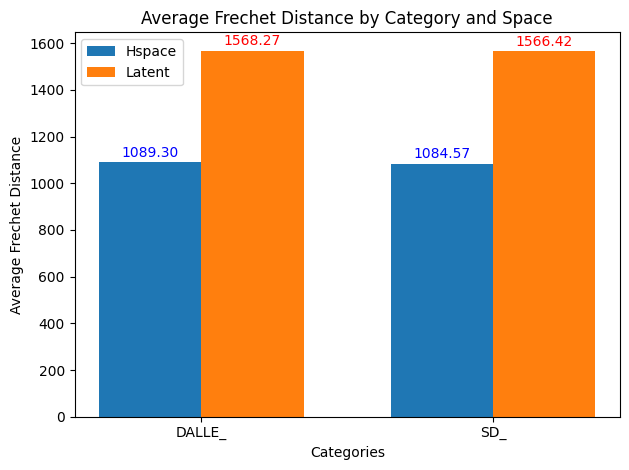

In [54]:
import matplotlib.pyplot as plt

# Extract data for plotting
hspace_values = [average_frechet_distances[cat]['hspace'] for cat in categories]
latent_values = [average_frechet_distances[cat]['latent'] for cat in categories]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# Highlight the differences by adding text annotations
for i in range(len(categories)):
    ax.text(x[i] - width/2, hspace_values[i] + 10, f'{hspace_values[i]:.2f}', ha='center', va='bottom', color='blue')
    ax.text(x[i] + width/2, latent_values[i] + 10, f'{latent_values[i]:.2f}', ha='center', va='bottom', color='red')
rects1 = ax.bar(x - width/2, hspace_values, width, label='Hspace')
rects2 = ax.bar(x + width/2, latent_values, width, label='Latent')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Categories')
ax.set_ylabel('Average Frechet Distance')
ax.set_title('Average Frechet Distance by Category and Space')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

fig.tight_layout()

plt.show()


In [ ]:

# 計算 Frechet Distances
frechet_distances = calculate_frechet_distances(data_dict, categories)

# 計算每個 category 的 Frechet Distance 平均值
average_frechet_distances = calculate_average_frechet_distances(frechet_distances)

# 輸出結果
print("Frechet Distances:", frechet_distances)
print("Average Frechet Distances:", average_frechet_distances)

KeyError: 'S'